## Prep environment

### Dependencies

In [1]:
import yfinance as yf
import pandas as pd
import os
import numpy as np
import time
from datetime import datetime, date
import random
import re
import copy
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib
import math
import plotly

import pathlib

from datetime import datetime, date
import os
import smtplib
import pathlib

from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.message import EmailMessage
from email.mime.base import MIMEBase
from email import encoders
import imaplib

import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

import smtplib, ssl # for sending emails
import schedule # for scheduling the code to run

/Users/tylerhinnendael/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tylerhinnendael/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
from IPython.core.display import display, HTML
from dash import Dash, dash_table
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

### Directories (hidden)

### Import module, data and tickers

In [4]:
# import the dictionary of company tickers that I want to follow
# includes the company name as key, then value with the ticker in a list
import company_tickers as tickers

stocks_owned = tickers.stocks_owned
owned_quantity = tickers.owned_quantity
company_tickers_dict = tickers.company_tickers
company_tickers = company_tickers_dict
#company_tickers_dict

# import the stocks_functions.py
import analyze_stocks

## Extract stock prices and prepare data

- Uses Yahoo Finance API and yfinance package

### API calls 

In [5]:
# create ticker objects from a dictionary
    # need to refactor so that the values for company_tickers are nested dictionaries with an explicit key, not lists.
    # then need to refactor all the functions
company_tickers = analyze_stocks.create_tickers(company_tickers_dict)

Tickers created


In [6]:
# create dataframe of 6-month price data for each ticker
company_tickers = analyze_stocks.extract_price_history(company_tickers)

#### add: price target, % of price target, % of all time high
## choose where the 1 or 6 montb % is negative, buy/strong buy, % is < -5%

$AY: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AY: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")
$AY: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")
$AMPS: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")
$AMPS: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")
$AMPS: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")



6 Month price history extracted! Thanks Yahoo Finance


In [43]:
company_tickers['Apple'][3].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-04 00:00:00-04:00,204.080327,207.443257,201.256270,202.922775,75109300,0.0,0.0
2025-08-05 00:00:00-04:00,202.972655,204.908581,201.735270,202.493668,44155100,0.0,0.0
2025-08-06 00:00:00-04:00,205.197986,214.927501,205.158061,212.801971,108483100,0.0,0.0
2025-08-07 00:00:00-04:00,218.420141,220.386003,216.124970,219.567719,90224800,0.0,0.0
2025-08-08 00:00:00-04:00,220.366045,230.514676,218.789363,228.868149,113854000,0.0,0.0


### Cleaning and Feature Engineering

In [7]:
company_tickers = analyze_stocks.clean_price_history(company_tickers)
company_tickers = analyze_stocks.add_recommendations(company_tickers)

Dataframes cleaned

Number of analysts is 0 for Carver Bancorp
Number of analysts is 0 for Broadway Financial
No recommendation for Adasina Social Justice ETF
Number of analysts is 0 for Adasina Social Justice ETF
Number of analysts is 0 for Citizens Bancshares
Number of analysts is 0 for Urban One
No recommendation for Atlantica Sustainable
Number of analysts is 0 for Atlantica Sustainable
No recommendation for Altus Power
Number of analysts is 0 for Altus Power

Recommendations added to the master dictionary


#### Compute the percentage change for 6 months, 1 month, and 5 days - add column to the dataframes

In [8]:
changes = analyze_stocks.calculate_changes(company_tickers)

Changes calculated


In [9]:
changes.head()

,Company,5-day Price Change,5-day Change %,1-Mo Price Change,1-Mo Change %,6-mo Price Change,6-mo Change %,"5-day (start, end) price","1-mo (start, end) price","6-mo (start, end) price",Buy?,Num Analysts
0,Apple,11.740021,4.55,2.750000,1.03,67.087234,33.06,"(258.2699890136719, 270.010009765625)","(267.260009765625, 270.010009765625)","(202.9227752685547, 270.010009765625)",buy,40.0
1,Meta,33.440002,4.97,47.619995,7.23,-68.804138,-8.88,"(672.969970703125, 706.4099731445312)","(658.7899780273438, 706.4099731445312)","(775.214111328125, 706.4099731445312)",strong_buy,59.0
2,Microsoft,-57.209991,-11.90,-49.480011,-10.46,-110.391907,-20.68,"(480.5799865722656, 423.3699951171875)","(472.8500061035156, 423.3699951171875)","(533.7619018554688, 423.3699951171875)",strong_buy,52.0
3,Netflix,-2.820000,-3.30,-8.699997,-9.51,-34.338997,-29.32,"(85.58000183105469, 82.76000213623047)","(91.45999908447266, 82.76000213623047)","(117.0989990234375, 82.76000213623047)",buy,40.0
4,Google,9.899994,2.96,27.579987,8.69,149.452316,76.47,"(335.0, 344.8999938964844)","(317.32000732421875, 344.8999938964844)","(195.4476776123047, 344.8999938964844)",strong_buy,17.0


## Prepare Visualizations and Tables

- plotly

### Color maps

In [82]:
# parameters used for the dashboard and plots
color_style = {'Beach': {'heading_color': 'darkseagreen',
                         'plot_color_dash': 'lightgray', #  #'white'
                         'heading_font': 'peru',
                         'heading_font2': 'peru',
                         'plot_color_back': "rgba(0, 0, 0, 0)", #
                         'plot_font': 'black', # peru
                         #### tables 
                         'table_header_fill': 'darkseagreen',  ##"powderblue"   ## "rgba(30,144,255, 0.7)"
                         
                         'table_font': 'white',##
                         'table_cells_fill': 'black',##
                         'line_color_buy': 'darkseagreen',##
                         'point_color_buy': 'Tan',  ##
                         'line_buy_bground': "rgba(211, 211, 211, 0.1)", ## "rgba(128, 128, 128, 0.1)"
                         #### table - sell
                         'table_header_fill_sell': 'darkseagreen', #"rgba(219,112,147, 0.7)"
                         'line_color_sell': 'darkseagreen', 
                         'point_color_sell': 'Tan'
                         
                         },
               
               'Neon': {'heading_color': 'black',
                        'plot_color_dash': 'rgba(0,0,0, 1)',
                        'heading_font': 'silver',
                        'plot_color_back': "rgba(0, 0, 0, 0)",
                        'plot_font': 'white',
                        #### tables
                        'table_header_fill': "rgba(30,144,255, 0.7)",
                        'table_font': 'white',
                        'table_cells_fill': 'black',
                        'line_color_buy': 'dodgerblue',
                        'point_color_buy': 'gold', 
                        'line_buy_bground': "rgba(128, 128, 128, 0.1)", 
                        #### table - sell
                        'table_header_fill_sell': "rgba(219,112,147, 0.7)",
                        'line_color_sell': 'palevioletred', 
                        'point_color_sell': 'purple'
                        
                       },
}

# discrete colors for each color style
color_dict = {'Beach': ["papayawhip", "powderblue", "teal", "white", "yellowgreen", "peru"], 
              'Beach_lengthy': [],
              'Neon': ['darkviolet', 'palevioletred', 'mediumpurple', 'dodgerblue', 'mediumblue'], 
              'Continuous_beach': px.colors.diverging.BrBG # returns a list
             }

In [11]:
style_key = 'Beach'

In [147]:
cmap = matplotlib.colors.ListedColormap(color_dict['Neon'], name='from_list', N=None)
#display(cmap)
cmap = matplotlib.colors.ListedColormap(color_dict['Beach'], name='from_list', N=None)
#display(cmap)

### Industry Overview

In [13]:
long_df = analyze_stocks.create_industry_df(changes, company_tickers)

In [14]:
long_df.head()

,Industries,Buy?,Count_x,Count_y,Ratio,Companies
0,Big Tech,buy,2,6,0.33,"Apple, Netflix"
1,Big Tech,strong_buy,4,6,0.67,"Meta, Microsoft, <br>Google, Nvidia"
2,Consumer,buy,4,9,0.44,"Best Buy, Costco, <br>Live Nation, General Motors"
3,Consumer,hold,3,9,0.33,"Lululemon, Target, Dollar Tree"
4,Consumer,strong_buy,2,9,0.22,"Walmart, TJ Maxx"


In [83]:
industry_barStacked = analyze_stocks.create_industry_stackedbar(long_df, color_style, 
                                                                color_dict, style_key)

Stacked barchart created


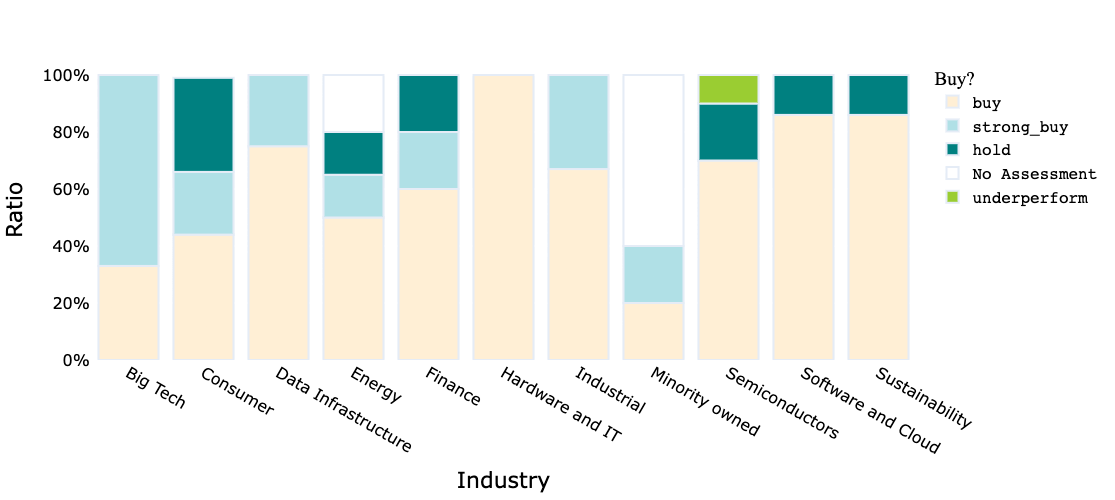

In [84]:
industry_barStacked

### Stocks that may be buying opportunities 

- based on analyst recommendations and technical indicators

In [85]:
# Subset down to companies with certain negative rates of change - 6mo, 1mo, 5day
possible_buy = changes[(changes['Buy?'] == 'buy') | (changes['Buy?'] == np.nan) | (changes['Buy?'] == 'strong_buy') ]
#possible_buy = changes[(changes['5-day Change %'] < -2.0)# & 
possible_buy = changes[(changes['5-day Change %'] < -4.0) & 
                      ( (changes['1-Mo Change %'] < -3.0)   | 
                        (changes['6-mo Change %'] < -3.0) )
                      ]

In [86]:
##### add .info['targetMeanPrice']
table_buy_recs = analyze_stocks.create_table_buy_recs(possible_buy, color_style, color_dict, style_key)

Table created for analyst recommendations on stocks to buy


In [87]:
table_buy_prices = analyze_stocks.create_table_buy_prices(possible_buy, color_style, color_dict, style_key)

Table created for previous stock prices on stocks to buy


In [88]:
viz_month = analyze_stocks.get_prices_one_month(possible_buy, company_tickers)

Dataframe created for visualizing line graphs.


In [89]:
all_buy_plots = analyze_stocks.create_line_graph_buy(viz_month, possible_buy, color_style, color_dict, style_key)

Line graphs created for potential stocks to buy


### Line graph with filters and drop down

#### Create graph

In [142]:
from importlib import reload
reload(analyze_stocks)

<module 'analyze_stocks' from '/Users/tylerhinnendael/Desktop/Data Science /Stock Trading Project/analyze_stocks.py'>

In [132]:
color_dict['Beach']

['papayawhip', 'powderblue', 'teal', 'white', 'yellowgreen', 'peru']

In [145]:
industry_names = ['Big Tech', 'Semiconductors']
df_daily_perc = analyze_stocks.calculate_daily_percent(industry_names, company_tickers)
display(df_daily_perc.head())
additional_colors = ['midnightblue', 'royalblue', 'deepskyblue', 'skyblue', 'steelblue', 
                    'darkgreen', 'forestgreen', 'mediumseagreen', 'darkseagreen', 'limegreen', 
                    'yellow', 'gold', 'goldenrod', 'darkgoldenrod', 'tan']
line_graph_multiple = analyze_stocks.create_line_graph_multiple(df_daily_perc, color_dict['Beach'], additional_colors)

,Apple,Meta,Microsoft,Netflix,Google,Nvidia,Intel Corp,Qualcomm,Applied Materials,Kulicke and Soffa,ASML Holding,United Micro electronics,Lam Research,AMD,Arm Holdings,KLA Corp
2026-01-06 00:00:00-05:00,-1.83,0.28,1.20,-0.89,-0.87,-0.47,1.70,3.48,4.11,4.44,1.14,4.50,6.26,-3.04,-0.50,3.15
2026-01-07 00:00:00-05:00,-0.77,-1.81,1.04,0.09,2.51,1.00,6.47,-1.24,-1.29,0.71,-1.10,9.98,-1.87,-2.02,0.13,-2.53
2026-01-08 00:00:00-05:00,-0.50,-0.41,-1.11,-0.22,1.11,-2.15,-3.57,0.93,-3.61,-0.07,-2.78,-4.26,-1.04,-2.54,-2.25,-2.58
2026-01-09 00:00:00-05:00,0.13,1.08,0.24,-1.18,0.96,-0.10,10.80,-2.25,6.94,2.59,6.66,2.81,8.66,-0.74,-1.14,5.69
2026-01-12 00:00:00-05:00,0.34,-1.70,-0.44,-0.06,1.09,0.04,-3.27,-4.79,2.01,1.75,0.58,0.68,0.93,2.22,-0.58,2.01


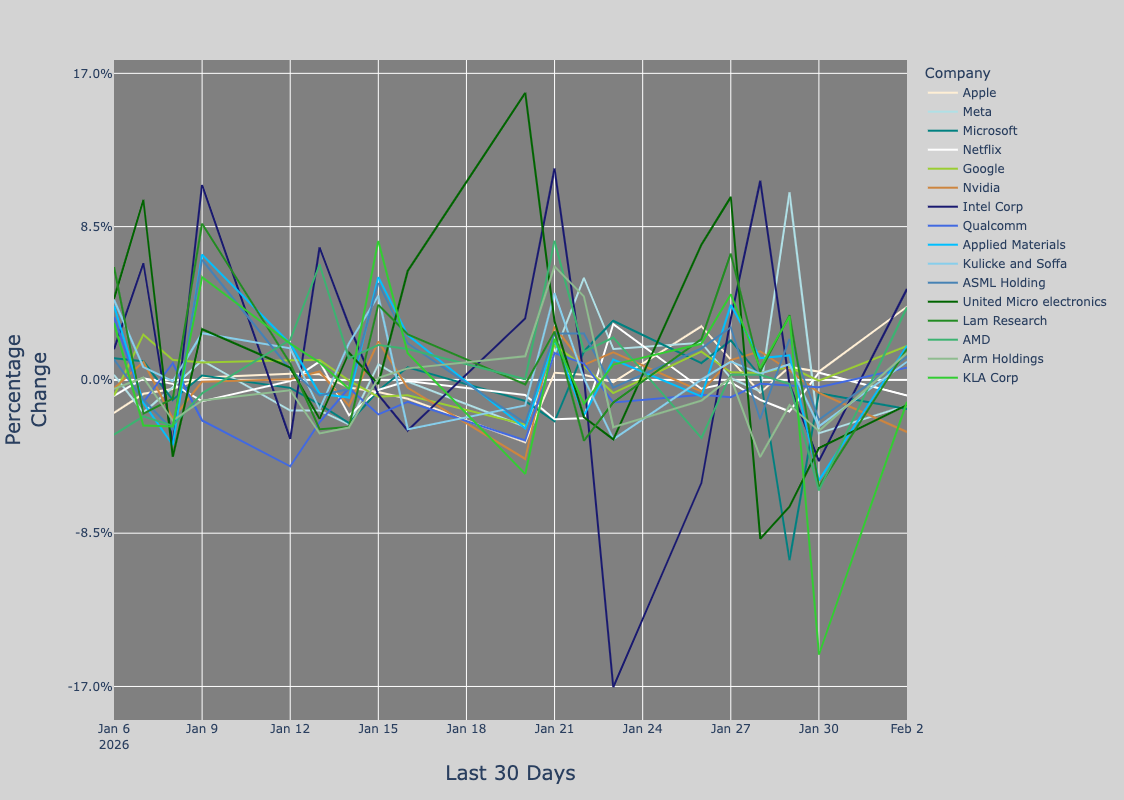

In [146]:
line_graph_multiple

### Hone in on stocks currently owned (dummy set - IN DEVELOPMENT)

- skip, remove from dashboard. Need to refactor to a dictionary, not list.

<module 'analyze_stocks' from '/Users/tylerhinnendael/Desktop/Data Science /Stock Trading Project/analyze_stocks.py'>

In [107]:
del(stocks_owned)

In [122]:
stocks_owned = analyze_stocks.calculate_stocks_owned(stocks_owned, company_tickers) #### need to test

Could not add price history for Atlantica Sustainable
Data on stocks owned has been appended to. Columns are: 
 ['Atlantica Sustainable', 'Plug Power', 'Iridium', 'Bloom Energy', 'Qualcomm', 'Weyerhaeuser', 'Meta', 'Microsoft', 'Apple']


## Export plotly figures 

In [148]:
os.getcwd()

'/Users/tylerhinnendael/Desktop/Data Science /Stock Trading Project'

In [149]:
industry_barStacked.write_html('industry_barStacked.html')

In [150]:
line_graph_multiple.write_html('line_graph_multiple.html')

In [151]:
table_buy_recs.write_html('table_buy_recs.html')

In [152]:
table_buy_prices.write_html('table_buy_prices.html')

## Run Dashboard

### Top half of output, because the dashboard does not display in the notebook in github

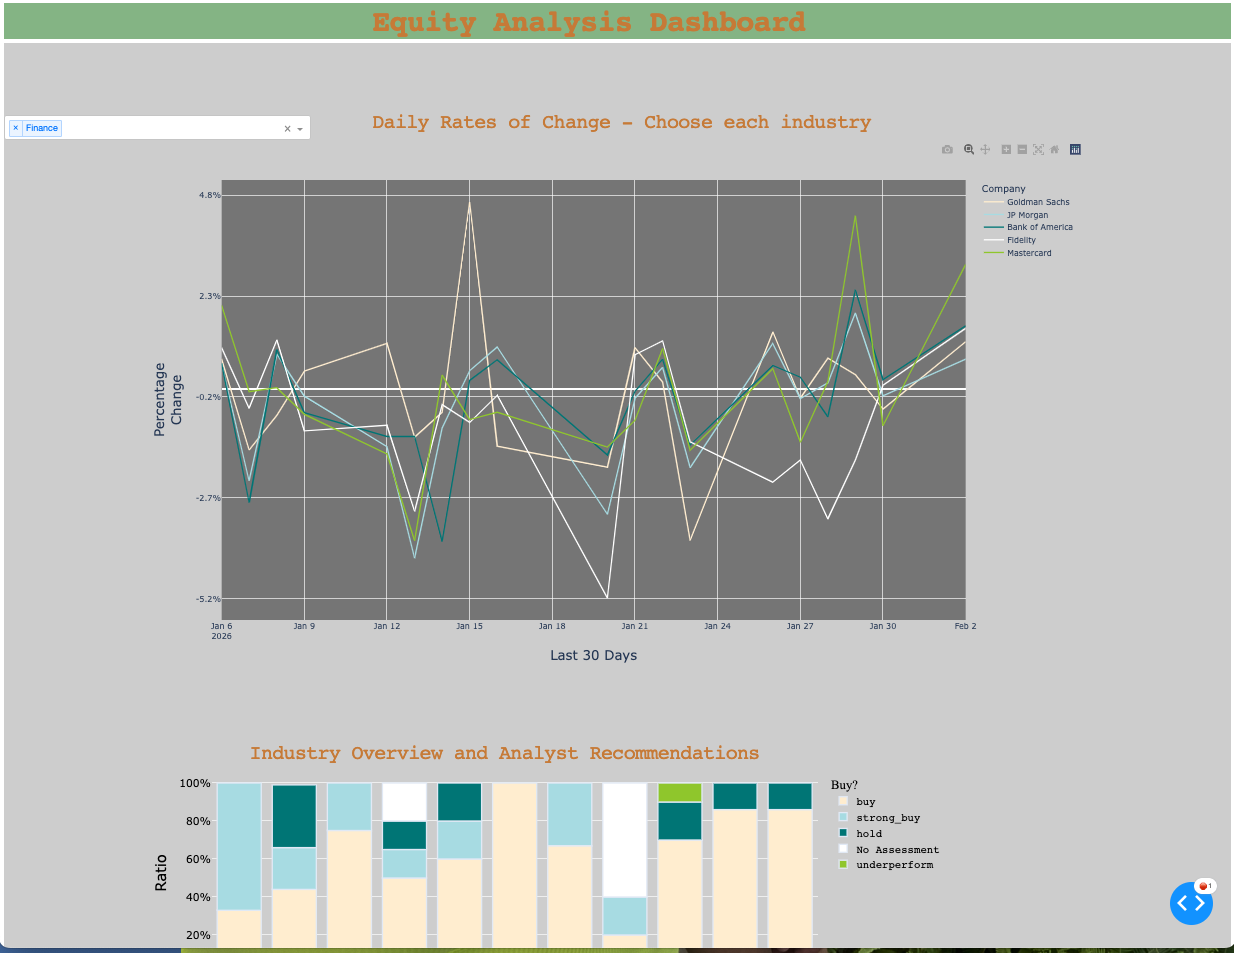

### Run cell below to execute dashboard

In [140]:
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

print("if a link to the dashboard is not provided, copy the following url into a new browser tab: 'http://127.0.0.1:8050/'\n\n------------------")

# creates the dashboard using the figures, tables, and markdown.
app.layout = html.Div(
    [ 
        html.H1("Equity Analysis Dashboard", style = {'font-weight': 'bold', 'float': 'center', 'font_size': '20px', 'font-family': 'courier',
                                          'color': color_style[style_key]['heading_font'], 'marginLeft': '30%', 'margin-bottom': 5}),
        dcc.Markdown(children = ""),

########### H3 section 1
        html.Div([
            html.H3("Daily Rates of Change - Choose each industry", style = {#'font-weight': 'bold', 
                                                      'font_size': '20px', 'font-family': 'courier',
                                                                            'textAligh': 'center', 'marginLeft': '30%', #'marginRight': '80%',
                                                                           'margin-bottom': -30, 'margin-top': 100,
                                                            #"backgroundColor": color_style[style_key]['heading_color']
                                                                           }),
            dcc.Dropdown(list(set(list(long_df['Industries']))), list(set(list(long_df['Industries'])))[:2], 
                         multi= True, id = 'dropdown-2', style={'width': '50%'}),
            dcc.Graph(id="graph", style = {'marginLeft': '12%'})
            #dcc.Checklist(id = 'checklist', 
            #              options = list(set(list(long_df['Industries']))),
            #              value = list(set(list(long_df['Industries'])))[:2],
            #              inline = True
            #             ) ###
            
        ], 
    style = {'width':'100%', 'float':'left', 'backgroundColor': color_style[style_key]['plot_color_dash'], "maxHeight": "1200px", "overflow": "scroll",
                    'color': color_style[style_key]['heading_font']}
    ),
        
########### H3 section 2

        html.Div([
            html.H3("Industry Overview and Analyst Recommendations", style = {#'font-weight': 'bold', 
                                                                              'font_size': '20px', 'font-family': 'courier',
                                                                            'textAligh': 'center', 'marginLeft': '20%', #'marginRight': '80%',
                                                                           'margin-bottom': -50, 'margin-top': 100,
                                                            #"backgroundColor": color_style[style_key]['heading_color']
                                                                           }),
            dcc.Graph(figure=industry_barStacked, style = {'marginLeft': '12%'})
        ], style = {'width':'100%', 'float':'left', 'backgroundColor': color_style[style_key]['plot_color_dash'], "maxHeight": "800px", "overflow": "scroll",
                    'color': color_style[style_key]['heading_font']}),

########### H3 section 3
        html.Div([
            html.H3("1-Month Charts", style = {#'font-weight': 'bold', 
                                               'font_size': '12px', 'textAligh': 'center',
                                                                       'font-family': 'courier',
                                                                        'marginLeft': '15%', 'margin-bottom': -20, 'margin-top': 20,
                                                            #"backgroundColor": color_style[style_key]['heading_color']
                                                            }),
            dcc.Graph(figure=all_buy_plots)
        ], style = {#'marginLeft': '5%',
                    'width':'35%', # was 35% with no margin or empty section to left
                    'float':'left', 'backgroundColor': color_style[style_key]['plot_color_dash'], 'horizontal-align': 'right', 'vertical-align': 'middle', #'rgba(70,130,180, 0.7)'
                    "maxHeight": "700px", "overflow": "scroll", 'color': color_style[style_key]['heading_font'], 'font_size': '40px'}), #### 
                ### change height to 800 for charts, 400 and 400 for tables
        #####
        html.Div([
            html.H3("Analyst Recommendations", style = {#'font-weight': 'bold', 
                                                        'font_size': '6px', 'textAligh': 'center',
                                                          'font-family': 'courier',
                                                          'marginLeft': '20%', 'margin-bottom': -80, 'margin-top': 20,
                                                            #"backgroundColor": color_style[style_key]['heading_color']
                                                      }),
            dcc.Graph(figure=table_buy_recs)
        ], style = {'width':'30%', 'float':'left', 'backgroundColor': color_style[style_key]['plot_color_dash'], "maxHeight": "700px", 
                    "overflow": "scroll", 'color': color_style[style_key]['heading_font']}),
        ####
        html.Div([
            html.H3("Price % Increase / Decrease", style = {#'font-weight': 'bold', 
                                                            'font_size': '20px', 'textAligh': 'center',
                                                          'font-family': 'courier',
                                                          'marginLeft': '20%', 'margin-bottom': -80, 'margin-top': 20,
                                                            #"backgroundColor": color_style[style_key]['heading_color']
                                                          }),
            dcc.Graph(figure=table_buy_prices)
        ], style = {'width':'35%', 'float':'left', 'backgroundColor': color_style[style_key]['plot_color_dash'], "maxHeight": "700px", 
                    "overflow": "scroll", 'color': color_style[style_key]['heading_font']}),
        
    ],
    style = {"backgroundColor": color_style[style_key]['heading_color']} # dashboard background all sections

)
        
######## callback for the dropdown for the rates of change line graph
@app.callback(
    Output("graph", "figure"),
    Input('dropdown-2', "value"))

def update_line_graph(industries, color_palette = color_dict['Beach'], 
                      additional_colors = additional_colors):
    industry_names = industries
    df_daily_perc = analyze_stocks.calculate_daily_percent(industry_names, company_tickers) # dataframe
    fig = analyze_stocks.create_line_graph_multiple(df_daily_perc, color_palette = color_palette, 
                                                    additional_colors = additional_colors) # line graph
    return(fig)
########


host = '127.0.0.1'
if __name__ == '__main__':
    #http://127.0.0.1:8050/
    #app.run_server(mode='inline', debug=True, port=8050)
    app.run_server(mode='external', host = host, debug=True, port=8050)

if a link to the dashboard is not provided, copy the following url into a new browser tab: 'http://127.0.0.1:8050/'

------------------


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/Desktop/Data Science /Stock Trading Project/analyze_stocks.py:751, in calculate_daily_percent(
    industry_names=['Semiconductors', 'Finance', 'Industrial', 'Energy'],
    company_tickers={'3M': ['MMM', 'Industrial', yfinance.Ticker object <MMM>,                          Date       Close
0   20...0:00:00-05:00  153.429993

[126 rows x 2 columns],                         Date       Close
0  2026...3.160004
19 2026-02-02 00:00:00-05:00  153.429993,                        Date       Close
0 2026-0...53.160004
4 2026-02-02 00:00:00-05:00  153.429993, 'buy', 17], 'ADP': ['ADP', 'Software and Cloud', yfinance.Ticker object <ADP>,                          Date       Close
0   20...0:00:00-05:00  247.559998

[126 rows x 2 columns],                         Date       Close
0  2026...6.820007
19 2026-02-02 00:00:00-05:00  247.559998,     